# Desviación estándar y Ángulos

In [289]:
import numpy as np 

In [290]:
x = np.array([1,-2,3,2])

In [291]:
np.mean(x)

1.0

In [292]:
x_t = x - np.mean(x)*np.array([1,1,1,1])
x_t

array([ 0., -3.,  2.,  1.])

In [293]:
np.mean(x_t)

0.0

In [294]:
np.linalg.norm(x_t)/np.sqrt(x_t.size)

1.8708286933869707

In [295]:
np.std(x)

1.8708286933869707

## Promedio, RMS y desviación estandar

$$
rms(x)^2 = avg(x)^2 + std(x)^2
$$

In [296]:
rms2 = np.sum(x**2)/x.size
rms2

4.5

In [297]:
avg2 = np.mean(x)**2
avg2

1.0

In [298]:
std2 = np.std(x)**2
std2

3.5

In [299]:
rms2 == avg2 + std2

True

In [300]:
rms2 = np.sum(x**2)/x.size
avg2 = np.mean(x)**2
std2 = np.std(x)**2
rms2 == avg2 + std2
#True

True

## Cálculo de riesgo-retorno de una inversión

In [301]:
import matplotlib.pyplot as plt 
import numpy as np 

In [302]:
a = np.array([0.1 for i in range(50)])
b = np.sin(np.linspace(0,4,50)) + np.random.uniform(-0.1,0.1,50)
c = np.cos(np.linspace(2,6,50)) + np.random.uniform(-0.1,0.1,50)
d = [i - np.random.uniform(0,0.8) for i in np.linspace(0,1,50)]

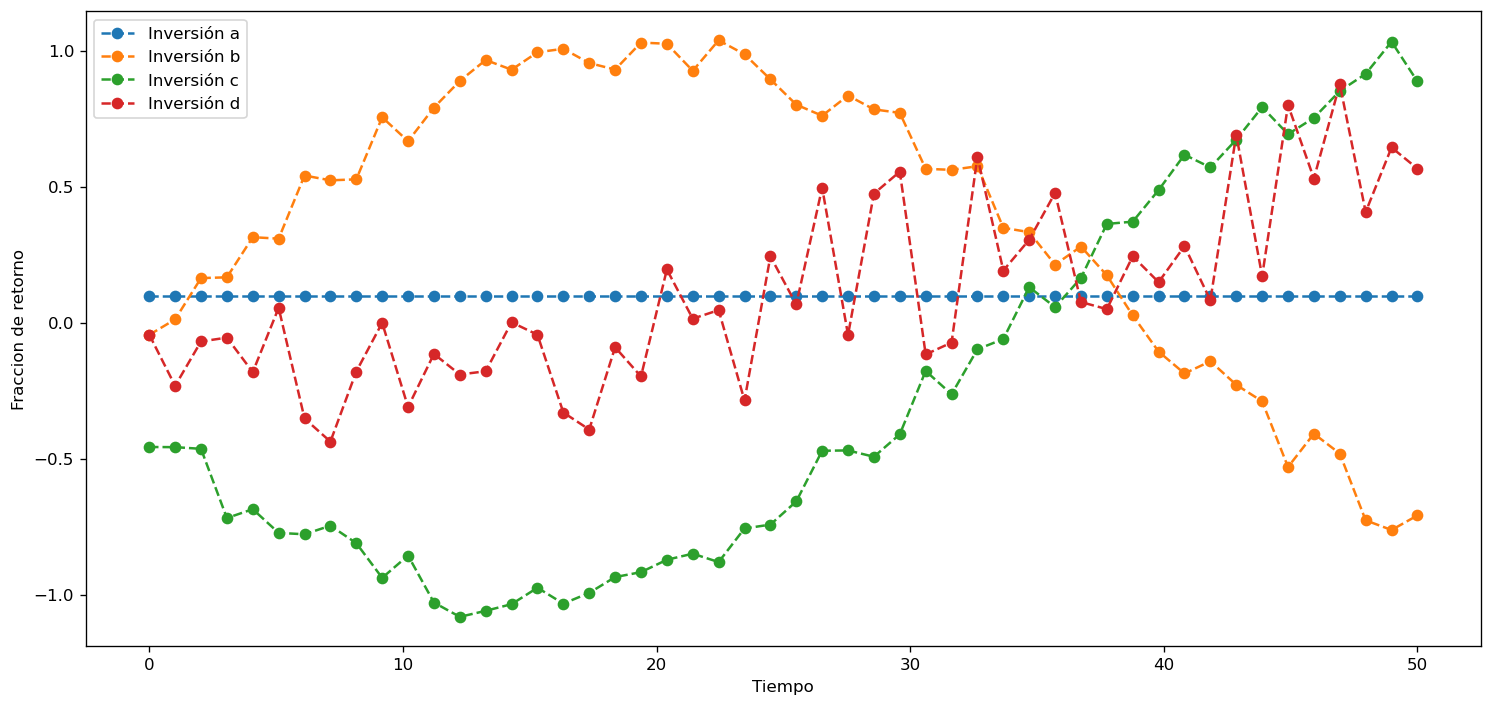

In [303]:
fig, ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
ax.plot(np.linspace(0,50,50),a, marker='o', linestyle='dashed',label='Inversión a')
ax.plot(np.linspace(0,50,50),b, marker='o', linestyle='dashed',label='Inversión b')
ax.plot(np.linspace(0,50,50),c, marker='o', linestyle='dashed',label='Inversión c')
ax.plot(np.linspace(0,50,50),d, marker='o', linestyle='dashed',label='Inversión d')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Fraccion de retorno')
ax.legend()
plt.show()

In [304]:
I = np.array([a,b,c,d])

In [305]:
M = np.array([np.mean(x) for x in I])
S = np.array([np.std(x) for x in I])

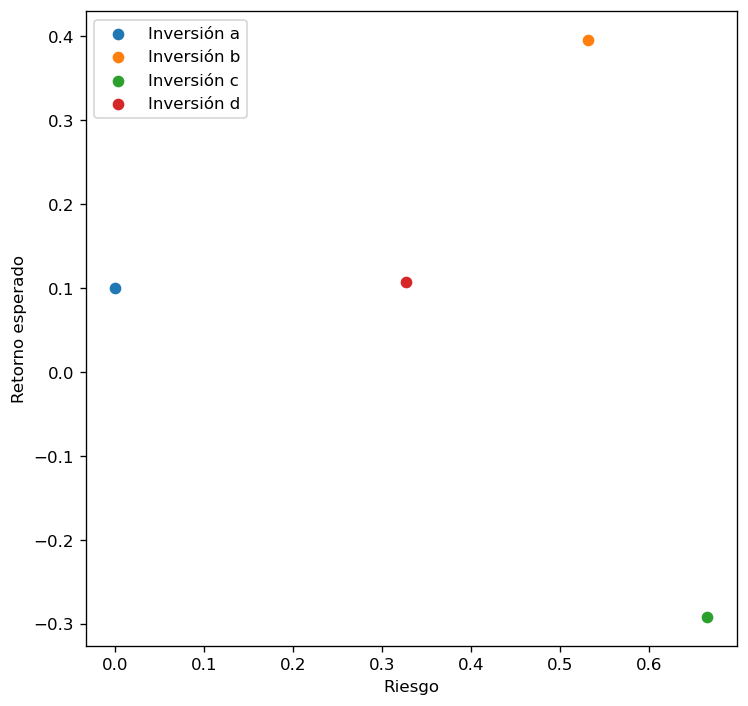

In [306]:
fig,ax  = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(S[0],M[0],label='Inversión a')
ax.scatter(S[1],M[1],label='Inversión b')
ax.scatter(S[2],M[2],label='Inversión c')
ax.scatter(S[3],M[3],label='Inversión d')
ax.set_xlabel('Riesgo')
ax.set_ylabel('Retorno esperado')
ax.legend()
plt.show()

## Estandarización

In [307]:
# az = (a - np.mean(a)) / np.std(a)
# bz = (b - np.mean(b)) / np.std(b)
# cz = (c - np.mean(c)) / np.std(c)
# dz = (d - np.mean(d)) / np.std(d)

In [308]:
from scipy import stats

az = stats.zscore(a)
bz = stats.zscore(b)
cz = stats.zscore(c)
dz = stats.zscore(d)

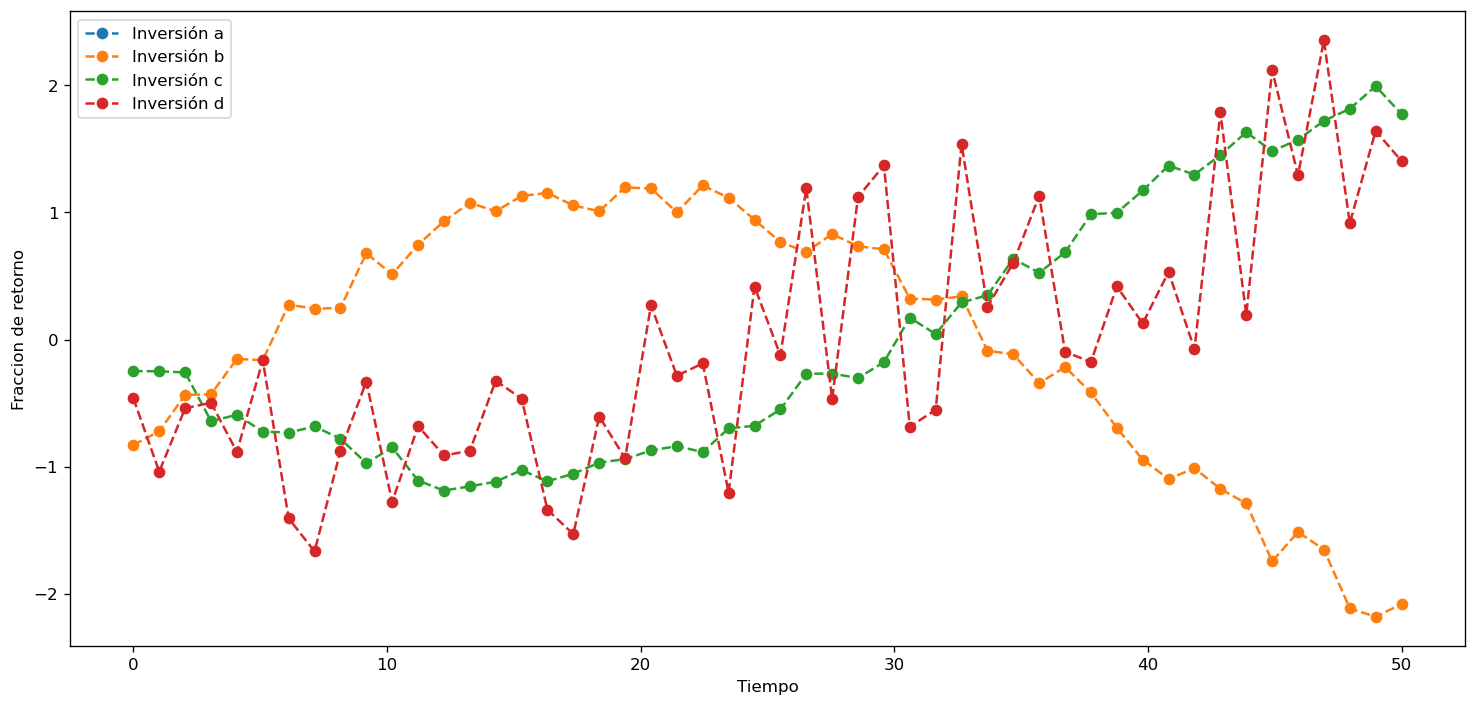

In [309]:
fig, ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
ax.plot(np.linspace(0,50,50),az, marker='o', linestyle='dashed',label='Inversión a')
ax.plot(np.linspace(0,50,50),bz, marker='o', linestyle='dashed',label='Inversión b')
ax.plot(np.linspace(0,50,50),cz, marker='o', linestyle='dashed',label='Inversión c')
ax.plot(np.linspace(0,50,50),dz, marker='o', linestyle='dashed',label='Inversión d')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Fraccion de retorno')
ax.legend()
plt.show()

In [310]:
I = np.array([az,bz,cz,dz])
M = np.array([np.mean(x) for x in I])
S = np.array([np.std(x) for x in I])

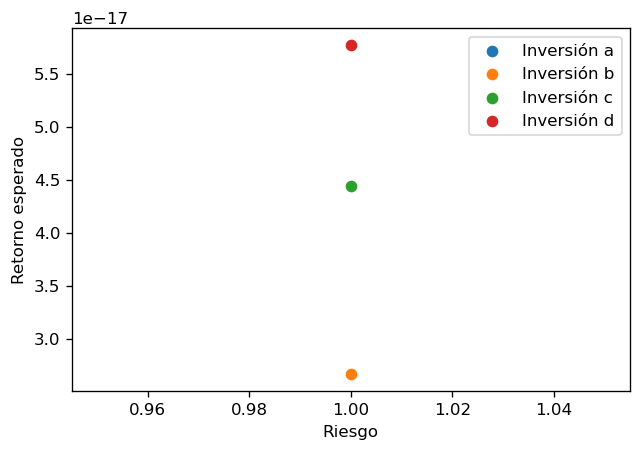

In [311]:
fig,ax  = plt.subplots(1,1,dpi=120)
ax.scatter(S[0],M[0],label='Inversión a')
ax.scatter(S[1],M[1],label='Inversión b')
ax.scatter(S[2],M[2],label='Inversión c')
ax.scatter(S[3],M[3],label='Inversión d')
ax.set_xlabel('Riesgo')
ax.set_ylabel('Retorno esperado')
ax.legend()
plt.show()